Dieses Jupyter Notebook berechnet die Reichweite eines Propellerflugzeugs mit der Formel von Breguet

$$
R = C \ln \left(\frac{m_{\textrm{Flugzeug}} + m_{\textrm{Crew}} + m_{\textrm{Brennstoff}}}{m_{\textrm{Flugzeug}} + m_\textrm{Crew}} \right).
$$

Dabei wurde die Start- und Endmasse in die Beiträge von Flugzeug und Crew, sowie des Brennstoffs unterteilt. Für das Flugzeug, das wir betrachten, gilt $C= 10^4\,$ km. Das Gewicht des Flugzeugs mit allem Equipment beträgt außerdem $m_{\textrm{Flugzeug}} = 900\,$ kg. Die Endmasse bezieht sich auf die Leermasse des Flugzeugs, also ohne das Gewicht von Crew und Brennstoff. 

Wir stellen uns folgendes Szenario vor: Es geht um eine Umrundung der Erde ohne auftanken. Flieger, die dafür in Frage kommen, sind recht leicht und das Gewicht der Crew hat einen gewissen Einfluss auf die Reichweite. In der Formel von Breguet sieht man, wie die Masse der Crew die Reichweite beeinflusst.

Sie als Ingenieur:in sollen die benötigte Menge an Treibstoff berechnen. Neben der Pilotin wird noch ein weiterer Passagier an dem Flug teilnehmen; es steht aktuell allerdings noch nicht fest, wer das sein wird (der Flug wird in einem Preisausschreiben verschenkt). Zur Verfügung steht ihnen die Formel von Breguet, außerdem beherrschen Sie die Monte Carlo Methode. Die einzige Vorgabe an den Passagier ist, das nur Handgepäck, mit dem üblichen Gewicht mitgenommen werden darf. 

# Modellierung der Unsicherheit in der Startmasse

Um eine Unsicherheitsquantifizierung durchführen zu können muss zunächst die unbekannten Größen modellieren. Das sind hier das Gewicht des zusätzlichen Passagiers und des Handgepäcks. Das Gewicht der Pilotin ist bekannt und beträgt $71\,$ kg. Aus bisherigen Flügen dieser Art wissen sie, dass $m_{\textrm{Brennstoff}} = 12000\,$ kg eine gute Masse an Brennstoff beinhaltet. Sie wollen nun ausrechnen, mit welcher Wahrscheinlichkeit dies ausreicht. Für eine Erdumrundung müssen Sie ungefähr $25000\,$ km fliegen können. 

Modellieren Sie die unbekannte Masse der Crew als Zufallsvariable. 

# Lösung: 
Man sollte die Verteilung des Körpergewichts der Bevölkerung zu Grunde legen. Daten bekommt man durch einen einfache google Suche (z.B. statista.com). Das Körpergewicht ist strenggenommen nicht normalverteilt, das soll aber hier zur Vereinfachung angenommen werden. Die folgende Abbildung zeigt eine grobe Näherung der normalverteilten Gewichte. Zusätzlich muss das Handgepäck berücksichtigt werden; hier kann man auch eine Normalverteilung annehmen und den Mittelwert und die Standardabweichung schätzen. Der Mittelwert ergibt sich dann zu 
$$\mu_\text{Crew} = 71 + \mu_{\textrm{Passagier}} + \mu_{\textrm{Handgepaeck}}.$$
Für die Standardabweichung erhält man 
$$\sigma_\text{Crew}^2 = \sigma_{\textrm{Passagier}}^2 + \sigma_{\textrm{Handgepaeck}}^2.$$

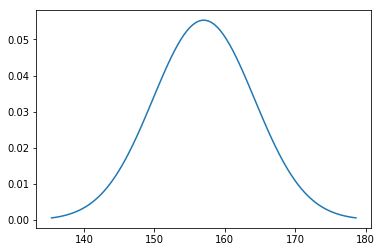

In [40]:
# Import der notwendigen Module 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 71 + 78 + 8
sigma_2 = 50^2 + 2^2
sigma = math.sqrt(sigma_2)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Mit einer Monte Carlo Simulation kann man nun herausfinden, wie hoch die WSK ist, dass der Brennstoff ausreicht. Wir simulieren einfach verschiedene Gewichte von möglichen Passagieren, anhand der soeben modellierten Verteilung. Für jedes simuliertes Gewicht, berechnen wir die Reichweite. Ist sie größer als $25000\,$km, ist der Brennstoff ausreichend (Erfolg), ansonsten verbuchen wir einen Misserfolg. Die WSK ergibt sich dann näherungsweise aus der relativen Häufigkeit eines Erfolgs. 

# Lösung

In [45]:
# Zu Beginn ist die absolute Häufigkeit eines Erfolgs gleich Null

H_Erfolg = 0    # die Variable H_Erfolg speichert die Häufigkeit eines Erfolgs
m_Brennstoff = 12100    # Gewicht des Brennstoffs
m_Flugzeug = 900

# Wir simulieren N Flüge mit unterschiedlichen Gewichten der Crew
N = 100000
for i in range(0,N):    # Starte die for-Schleife
    m_Crew = np.random.normal(loc=mu, scale=sigma)
    # Erzeuge zufällig das Gewicht der Crew
    R = 1e4*np.log((m_Flugzeug + m_Brennstoff + m_Crew)/(m_Flugzeug + m_Crew))   # Berechne Reichweite
    if(R > 25000):   # können wir die Erde umrunden? 
        H_Erfolg += 1          # notiere den Erfolg
        
# Wir müssen noch durch die Anzahl an Simulationen teilen, um die relative Häufigkeit zu erhalten
h_Erfolg = H_Erfolg/N

# Anzeigen der Ergebnisse
print(h_Erfolg)

0.99965


Modifizieren Sie die Brennstoffmasse so lagen, bis sie in mindestens 99.9 Prozent der Fälle die Erde umrunden können.

# Lösung
Der systematische Weg, wäre eine Optimierung von m_Brennstoff. Hier reicht es allerdings den Brennstoff etwas zu erhöhen: $12100\,$kg sind bereits ausreichend.